In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage

WMSE = 0.17280374022565023


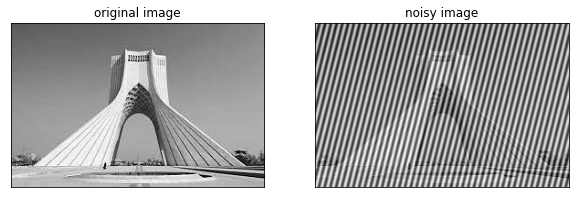

In [20]:
def WMSE(img1, img2, win_size):
  [m, n] = img1.shape

  NVF = np.ones(img1.size).reshape(img1.shape)

  for i in range(np.ceil(win_size / 2).astype(int), (np.size(img1, 0) - np.floor(win_size / 2)).astype(int)):
      for j in range(np.ceil(win_size / 2).astype(int), (np.size(img1, 1) - np.floor(win_size / 2)).astype(int)):
          win = img1[(i - np.ceil(win_size / 2) + 1).astype(int):(i + np.floor(win_size / 2)).astype(int),
                (j - np.ceil(win_size / 2) + 1).astype(int):(j + np.floor(win_size / 2)).astype(int)]
          NVF[i, j] = 1 / (1 + np.var(win[:]))
  wmse = np.sum(np.sum(NVF * ((img1 - img2) ** 2))) / (m * n)
  return wmse



img = np.array(cv2.imread(filename="azadi_tower.jpg", flags=cv2.IMREAD_GRAYSCALE)).astype('uint8')
img_norm = np.array(cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX))


[m, n] = img.shape
[a, b] = np.meshgrid(range(0, n), range(0, m))

periodic_noise = np.sin(a+b/4)+1
noisy_img = (img_norm + periodic_noise)/2
noisy_img_255 = np.array(cv2.normalize(noisy_img.astype('float'), None, 0.0, 255.0, cv2.NORM_MINMAX)).astype('uint8')


print("WMSE = {}".format(WMSE(img1=img_norm, img2=noisy_img, win_size=2)))

fig, axes= plt.subplots(1, 2, figsize=(10, 8))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('original image')

axes[1].imshow(noisy_img_255, cmap='gray')
axes[1].set_title('noisy image')


for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

